<a href="https://colab.research.google.com/github/namhsuya/datavis-experiments/blob/main/COVID_folium_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Background**
In this project we are going to work with COVID19 dataset, published by Johns Hopkins University, which consist of the data related to cumulative number of confirmed cases, per day, in each Country. Also we have another dataset consist of various life factors, scored by the people living in each country around the globe. Your task is to merge these two datasets to see if there is any  relationship between the spread of the virus in a country and how happy people are, living in that country.

##### **Section 1: COVID19 dataset & Libraries**
*Hints:*
*   Import all the relevant libraries and “Covid19_Confirmed_dataset.csv” dataset as a DataFrame.
*   Drop ‘Lat’ & ‘Long’ columns. Grouped the data with ‘Country/Region ‘using sum as an aggregate function.

*Task:*
* Visualize the data for India, China & US countries





In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns

In [ ]:
# Reading time_series_covid_19_confirmed.csv
covid = pd.read_csv('time_series_covid_19_confirmed.csv')
covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858,861,862,877,880,880,880,884,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525,541,576,607,638,687,705,749,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762


In [ ]:
covid_=covid.drop(['Lat', 'Long', 'Province/State'], axis = 1) 
covid_.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858,861,862,877,880,880,880,884,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525,541,576,607,638,687,705,749,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762


In [ ]:
x=covid_.groupby('Country/Region').sum()
x

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159,26764,27357,27973,28615,29229,29831,30394,30950,31465,31972,32504,33055,33626,34155,34693,35160,35712,36204,36699
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,858,861,862,877,880,880,880,884,884,889,889,897,897,897,907,907,918,922,925,925,925,937,939,939,944,955,955,955,963,963,977
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,346,346,346,386,386,396,458,462,506,525,541,576,607,638,687,705,749,779,812,851,880,916,932,950,1000,1078,1109,1148,1164,1199,1280,1344,1395,1483,1538,1572,1672,1679,1735,1762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3835,4277,4341,4647,5029,5220,5551,5931,6230,6566,6764,7064,7412,7764,8204,8549,8916,9228,9398,9744,10093,10306,10469,10621,10938,11284,11548,11837,12160,12297,12541,12770,13065,13398,13722,13928,14208,14510,14875,15184
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1248,1265,1284,1297,1318,1356,1380,1389,1465,1498,1516,1526,1552,1576,1581,1606,1619,1629,1640,1654,1674,1674,1681,1691,1703,1711,1726,1728,1730,1734,1734,1760,1763,1768,1796,1797,1804,1832,1831,1841


In [ ]:
x.loc[(x.index.isin(['China', 'India', 'US']))]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,11891,16630,19716,23707,27440,30587,34110,36814,39829,42354,44386,44759,59895,66358,68413,70513,72434,74211,74619,75077,75550,77001,77022,77241,77754,78166,78600,78928,79356,79932,...,84857,84871,84889,84917,84950,84992,84992,85071,85117,85117,85226,85246,85327,85402,85418,85503,85622,85708,85906,86045,86202,86381,86570,86783,86990,87213,87489,87655,87827,87985,88099,88206,88328,88460,88580,88672,88793,88906,88958,89045
India,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,673165,697413,719664,742417,767296,793802,820916,849522,878254,906752,936181,968857,1003832,1039084,1077781,1118206,1155338,1193078,1238798,1288108,1337024,1385635,1435616,1480073,1531669,1581963,1634746,1695988,1750723,1803695,1855745,1908254,1964536,2027074,2088611,2153010,2215074,2268675,2329638,2396637
US,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,16,16,24,30,...,2841241,2891124,2936077,2996098,3054699,3117946,3185737,3245925,3304942,3364157,3431574,3498902,3576157,3647715,3711413,3773260,3834677,3899211,3970121,4038816,4112531,4178970,4233923,4290337,4356206,4426982,4495015,4562107,4620592,4668172,4713540,4771080,4823890,4883582,4941755,4997929,5044864,5094400,5141208,5197118


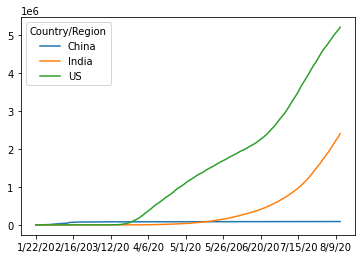

In [ ]:
cia=x.loc[(x.index.isin(['China', 'India', 'US']))].T
cia.plot()

##### **Section 2: Finding a good Measure**
*Hint:*
* Find the first derivative for the data using diff() command (let’s call it an Infection Rate’), calculate the maximum infection rate for India, China & US. 
* You may plot the Infection Rate for some countries also for a better understanding of data.

*Task:*
* Calculate the maximum ‘Infection Rate’ for each country and store it in a new column named ***‘max_infection_rate’***
* Create a New Data Frame name ‘Corona Data’ with ‘Country/Region’ as an index and ***‘max_infection_rate’*** as a column

In [ ]:
# maximum infection rate for India, China & US.
ciax = x.loc[(x.index.isin(['India', 'China', 'US']))].T
ciax.diff()

Country/Region,China,India,US
1/22/20,NaN,NaN,NaN
1/23/20,95.0,0.0,0.0
1/24/20,277.0,0.0,1.0
1/25/20,486.0,0.0,0.0
1/26/20,669.0,0.0,3.0
...,...,...,...
8/8/20,92.0,64399.0,56174.0
8/9/20,121.0,62064.0,46935.0
8/10/20,113.0,53601.0,49536.0
8/11/20,52.0,60963.0,46808.0


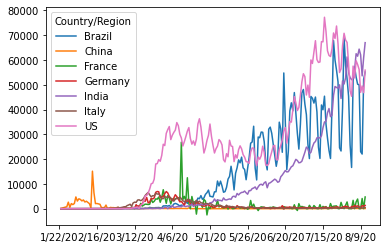

In [ ]:
#x['Infection Rate'] = x.diff()
# Plotting max infection rates...
ciax=x.loc[(x.index.isin(['China', 'India', 'US', 'Brazil', 'Germany', 'France', 'Italy']))].T
ciax.diff().plot()

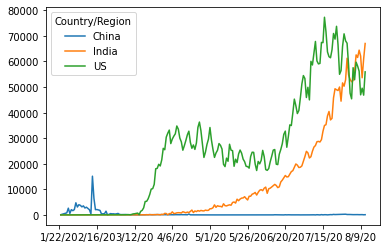

In [ ]:
# Plotting max infection rates of China, India and US
ciax=x.loc[(x.index.isin(['China', 'India', 'US']))].T
ciax.diff().plot()

In [ ]:
x['max_infection_rate']=x.T.diff().max()

In [ ]:
CoronaData = x['max_infection_rate'].to_frame()
CoronaData.columns=['max_infection_rate']
CoronaData.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,141.0
Algeria,675.0
Andorra,79.0
Angola,100.0


In [ ]:
TotalCorona=x.T.sum().to_frame()
TotalCorona.columns=['total_corona_cases']
TotalCorona.head()

,total_corona_cases
Country/Region,
Afghanistan,2526934.0
Albania,290474.0
Algeria,1704694.0
Andorra,109532.0
Angola,44920.0


##### **Section 3: World happiness report dataset**
*Hint:*
* Import the Worldwide_happiness_report.csv file as happiness_report.
* Drop 'Overall rank', 'Score', 'Generosity', 'Perceptions of corruption' columns. Set ‘Country or region’ column as Index

*Task:*
* Create a DataFrame named ‘data’ by merging ‘happiness_report’ with ‘Corona Data’ and find correlation among all variables


In [ ]:
# Importing happiness report
happy = pd.read_csv('/content/worldwide_happiness_report.csv')

In [ ]:
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
# Dropping columns
happy.drop(['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption'], axis=1, inplace=True)

In [ ]:
# Setting Country or region as index
happy.rename(columns={'Country or region': 'Country/Region'}, inplace=True)
happy.set_index('Country/Region', inplace=True)
happy

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555
Tanzania,0.476,0.885,0.499,0.417
Afghanistan,0.350,0.517,0.361,0.000


In [ ]:
happy

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555
Tanzania,0.476,0.885,0.499,0.417
Afghanistan,0.350,0.517,0.361,0.000


In [ ]:
# merging happy with CoronaData
data = pd.merge(CoronaData, happy, left_index=True, right_index=True)
data

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,,
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,141.0,0.947,0.848,0.874,0.383
Algeria,675.0,1.002,1.160,0.785,0.086
Argentina,7663.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,1150.0,0.960,1.427,0.805,0.154
Vietnam,50.0,0.741,1.346,0.851,0.543
Yemen,116.0,0.287,1.163,0.463,0.143


In [ ]:
data_ = pd.merge(TotalCorona, happy, left_index=True, right_index=True)
data_

,total_corona_cases,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,,
Afghanistan,2526934.0,0.350,0.517,0.361,0.000
Albania,290474.0,0.947,0.848,0.874,0.383
Algeria,1704694.0,1.002,1.160,0.785,0.086
Argentina,7962304.0,1.092,1.432,0.881,0.471
Armenia,2218352.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,769721.0,0.960,1.427,0.805,0.154
Vietnam,51737.0,0.741,1.346,0.851,0.543
Yemen,95554.0,0.287,1.163,0.463,0.143


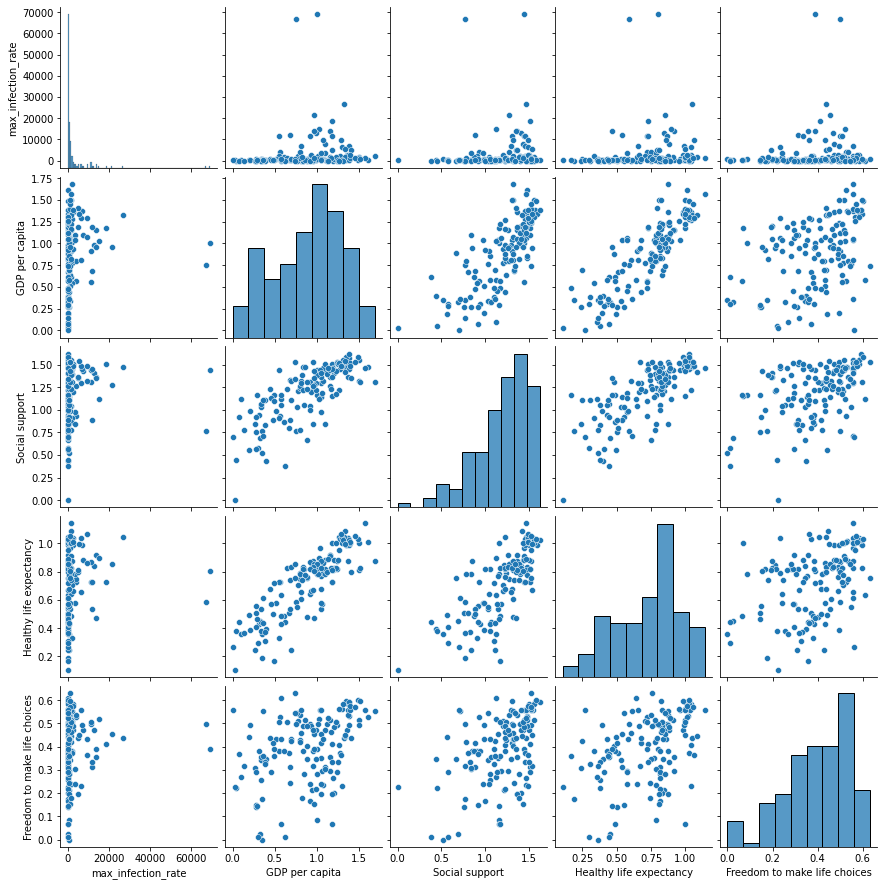

In [ ]:
sns.pairplot(data)

##### **Section 4: Visualization using Folium Map**
*Hint:*
* Create a DataFrame (named it data2) by adding the Lat & Long information available at COVID19 data set into DataFrame named ‘data’

*Task:*
* Visualize the data2 using Folium world map

In [ ]:
data2 = pd.merge(data, covid.set_index('Country/Region')[['Lat', 'Long']], left_index=True, right_index=True)
data2=data2.drop_duplicates()
ch=data2[data2.index=='China'][:1]
data2=data2.drop('China')
data2.append(ch)
data2

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Lat,Long
Country/Region,,,,,,,
Afghanistan,915.0,0.350,0.517,0.361,0.000,33.939110,67.709953
Albania,141.0,0.947,0.848,0.874,0.383,41.153300,20.168300
Algeria,675.0,1.002,1.160,0.785,0.086,28.033900,1.659600
Argentina,7663.0,1.092,1.432,0.881,0.471,-38.416100,-63.616700
Armenia,771.0,0.850,1.055,0.815,0.283,40.069100,45.038200
...,...,...,...,...,...,...,...
Venezuela,1150.0,0.960,1.427,0.805,0.154,6.423800,-66.589700
Vietnam,50.0,0.741,1.346,0.851,0.543,14.058324,108.277199
Yemen,116.0,0.287,1.163,0.463,0.143,15.552727,48.516388


In [ ]:
data2_ = pd.merge(data_, covid.set_index('Country/Region')[['Lat', 'Long']], left_index=True, right_index=True)
data2_=data2_.drop_duplicates()
ch=data2_[data2_.index=='China'][:1]
data2_=data2_.drop('China')
data2_.append(ch)
data2_

,total_corona_cases,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Lat,Long
Country/Region,,,,,,,
Afghanistan,2526934.0,0.350,0.517,0.361,0.000,33.939110,67.709953
Albania,290474.0,0.947,0.848,0.874,0.383,41.153300,20.168300
Algeria,1704694.0,1.002,1.160,0.785,0.086,28.033900,1.659600
Argentina,7962304.0,1.092,1.432,0.881,0.471,-38.416100,-63.616700
Armenia,2218352.0,0.850,1.055,0.815,0.283,40.069100,45.038200
...,...,...,...,...,...,...,...
Venezuela,769721.0,0.960,1.427,0.805,0.154,6.423800,-66.589700
Vietnam,51737.0,0.741,1.346,0.851,0.543,14.058324,108.277199
Yemen,95554.0,0.287,1.163,0.463,0.143,15.552727,48.516388


In [ ]:
# !pip install folium==0.11.0

In [ ]:
import folium

In [ ]:
def generateBaseMap(default_location=[20.593684, 78.96288], default_zoom_start=1):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [ ]:
from folium.plugins import HeatMap
base_map = generateBaseMap()
HeatMap(data=data2[['Lat', 'Long', 'max_infection_rate']].values.tolist(), radius=8, max_zoom=13).add_to(base_map)

In [ ]:
base_map.add_child(folium.ClickForMarker(popup='Potential Location'))

##### **Section5: Visualization of results using Seaborn.**

*Hint:*
* Plotting GDP vs maximum Infection rate
* Plotting Social support vs maximum Infection rate
* Plotting Healthy life expectancy vs maximum Infection rate
* Plotting Freedom to make life choices vs maximum Infection rate

*Task:*
* Based on the plot above, comment on the Indicators having strong relationship with COVID19 Infection?

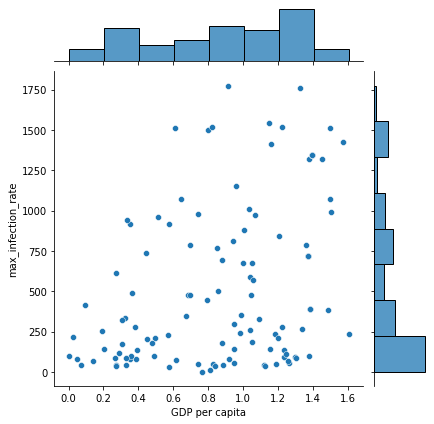

In [ ]:
#print(data2.columns)
sns.jointplot(data=data2[data2['max_infection_rate']<2000], y='max_infection_rate', x='GDP per capita', )

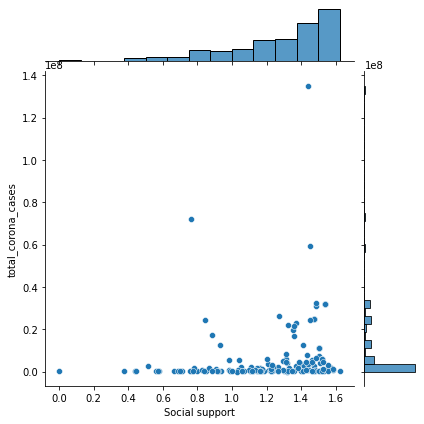

In [ ]:
sns.jointplot(data=data2_, y='total_corona_cases', x='Social support', )

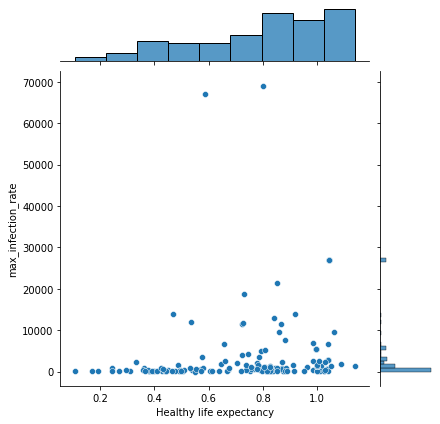

In [ ]:
sns.jointplot(data=data2, y='max_infection_rate', x='Healthy life expectancy', )

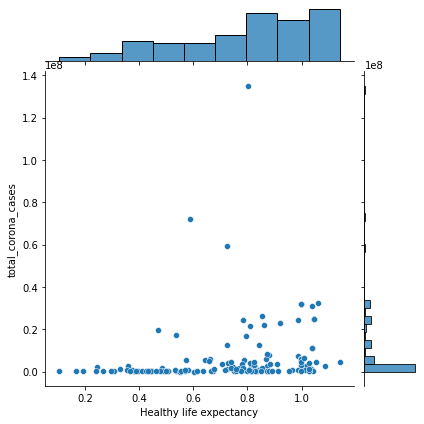

In [ ]:
sns.jointplot(data=data2_, y='total_corona_cases', x='Healthy life expectancy', )

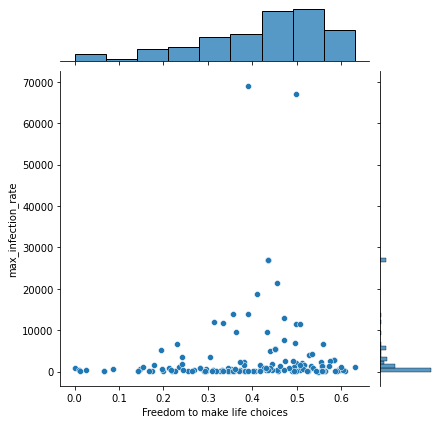

In [ ]:
sns.jointplot(data=data2, y='max_infection_rate', x='Freedom to make life choices',)

In [ ]:
data2.columns

Index(['max_infection_rate', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Lat',
       'Long'],
      dtype='object')

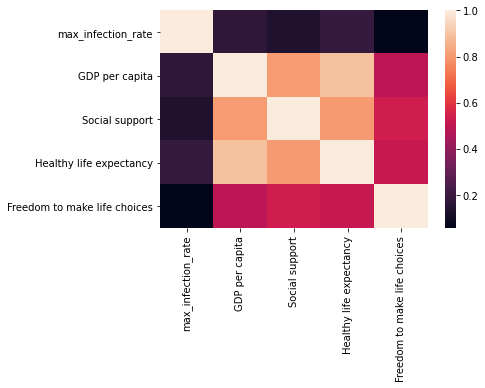

In [ ]:
import matplotlib.pyplot as plt
corr = data2[['max_infection_rate', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices']].corr()


sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,)


In [ ]:
corr

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.171581,0.134489,0.189413,0.056632
GDP per capita,0.171581,1.000000,0.810596,0.894244,0.497020
Social support,0.134489,0.810596,1.000000,0.806752,0.539172
Healthy life expectancy,0.189413,0.894244,0.806752,1.000000,0.518950
Freedom to make life choices,0.056632,0.497020,0.539172,0.518950,1.000000


##### **Answer**

From the scatterplots, and the corresponding heatmap that shows the correlation between COVID-19 infection rate across the globe, and the other criteria from the world happiness report, such as GDP per capita, Social support, Healthy life expectancy, and Freedom to make life choices, it's clearly evident that the infection rate is very weakly or almost not correlated with the other parameters. 

By this, we can not say clearly if COVID infection rate has a strong relationship with the other indicators or not.

In [ ]:
covid_animate=pd.merge(x, covid[['Country/Region','Lat','Long']], on='Country/Region')

In [ ]:
cov_list = []
for year in covid.columns[4:]:
  cov_list.append(covid[['Lat', 'Long', year]].values.tolist())

In [ ]:
#!pip install folium==0.11.0
folium.__version__

'0.11.0'

In [ ]:
from folium.plugins import HeatMapWithTime
base_map = generateBaseMap(default_zoom_start=2)
HeatMapWithTime(cov_list, radius=12, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, index_steps=5, min_speed=60, max_speed=144, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(base_map)
base_map